In [89]:
from collections import deque
import numpy as np
import csv
from pulp import *
from pulp import GLPK
import math

In [90]:
def dsatur(g):
    n = np.shape(g)[0]
    couleur = n*[0]
    
    #liste des sommets par ordre de degrés décroissants
    sommets_ord = tri_degre(Adj,True)
    
       
    #tant qu'il y a des sommets sans couleur    
    while 0 in couleur:
   
        #recherche du sommet à colorer, de degré de saturation maximum
        dsat = n*[0]
        degre_sat_max = 0
        sommetchoisi = sommets_ord[0]
        
        for i in sommets_ord:
            
            #si le sommet i est sans couleur
            if couleur[i]==0:

                vois = voisins(g,i)
               
                #calcul du degré de saturation du sommet i
                couleurvois = []
                for k in vois:
                    if couleur[k]>0:
                        couleurvois = couleurvois+[couleur[k]]
                dsat[i] = len(np.unique(couleurvois))
                
                #le sommet i est-il de degre de saturation maximum ?
                if dsat[i]>degre_sat_max :
                    degre_sat_max = dsat[i]
                    sommetchoisi = i
        
        #couleur des voisins du sommet choisi
        vois_sommetchoisi = voisins(g,sommetchoisi)
        couleurvois_sommetchoisi = []    
        for k in vois_sommetchoisi:
            couleurvois_sommetchoisi = couleurvois_sommetchoisi+[couleur[k]]        
        
        #choix de la plus petite couleur non présente chez les voisins du sommet choisi
        j=1
        while j in couleurvois_sommetchoisi:
            j=j+1
            
        #coloration du sommet choisi avec la couleur trouvée ci-dessus
        couleur[sommetchoisi]=j

    return couleur

"def dsatur(g):\n    n = np.shape(g)[0]\n    couleur = n*[0]\n    \n    #liste des sommets par ordre de degrés décroissants\n    sommets_ord = tri_degre(Adj,True)\n    \n       \n    #tant qu'il y a des sommets sans couleur    \n    while 0 in couleur:\n   \n        #recherche du sommet à colorer, de degré de saturation maximum\n        dsat = n*[0]\n        degre_sat_max = 0\n        sommetchoisi = sommets_ord[0]\n        \n        for i in sommets_ord:\n            \n            #si le sommet i est sans couleur\n            if couleur[i]==0:\n\n                vois = voisins(g,i)\n               \n                #calcul du degré de saturation du sommet i\n                couleurvois = []\n                for k in vois:\n                    if couleur[k]>0:\n                        couleurvois = couleurvois+[couleur[k]]\n                dsat[i] = len(np.unique(couleurvois))\n                \n                #le sommet i est-il de degre de saturation maximum ?\n                if dsa

In [108]:
def WP(LA):
    n=len(LA)
    # CONSTRUCTION DE LA MATRICE D'ADJACENCE
    M = matriceAdj(LA)
    
    # INITIALISATION DE LA LISTE DES DEGRES
    D = []
    # CONSTRUCTION DE LA LISTE DES DEGRES
    for i in range(n):
        d = 0
        # On balaie chaque ligne de la matrice d'adjacence
        for j in range(n):
            # Si un coefficient de la ligne est non nul, on incrÃ©mente d
            if M[i,j] != 0:
                d += 1
        D.append([i,d])
    
    # TRI DE LA LISTE DES DEGRES (DANS L'ORDRE DECROISSANT)
    D.sort(key=lambda degre: degre[1])
    D.reverse()
    
    # COLORATION
    # Initialisation de l'indice des couleurs
    C = 0
    # Initialisation du nombre de sommets coloriÃ©s
    ColoredVertices = 0
    # Boucle principale : on balaie D tant qu'il reste au moins un sommet Ã ...
    # colorier !
    while ColoredVertices < len(D):
        for i in range(len(D)):
            # On ne s'interesse qu'aux sommets non encore colories
            if len(D[i]) == 2:
                # Le sommet est potentiellement coloriable dans la couleur
                # courante
                ColPoss = True
                # Pour tous les sommets prÃ©cÃ©dant le sommet courant dans la
                # liste D...
                for j in range(i):
                    # Si le sommet d'indice j<i dans D est deja  colorie avec la
                    # couleur C et adjacent au sommet d'indice i dans D alors
                    # le sommet d'indice i dans D ne peut etre colorie avec C et
                    # on va passer au sommet suivant dans D sans rien faire.
                    if len(D[j]) == 3 and D[j][2] == C and M[D[i][0],D[j][0]] == 1:
                        ColPoss = False
                        break
                # Si on est dans une situation favorable, on colorie le sommet
                # d'indice i dans D avec la couleur courante.
                if ColPoss:
                    D[i].append(C)
                    ColoredVertices += 1
        # La liste D a ete balayee, on passe a  la couleur suivante...
        C +=1
    # Affichage des rzsultats
    print("Nombre de couleurs utilsÃ©es :",C)
    print("Sommets ayant la mÃªme couleur :")
    for i in range(C):
        s = "couleur " + str(i) + " : "
        for e in D:
            if e[2] == i:
                s += str(e[0]) + " "
        print(s)


In [92]:


### Affichage de graphes, avec GraphViz

import numpy as np
from graphviz import Digraph, Graph
import matplotlib
import matplotlib.cm
# Fonction d'affichage d'un graphe a  partir d'une matrice d'adjacence
# M : matrice d'adjacence avec ou sans les poids (matrice numpy)
# directed : bool indiquant si le graphe est oriente ou non
# weighted : bool indiquant si les arcs du graphe sont pondere ou non
# label : si None les labels seront 0, 1, 2,..., n-1
# color : vecteur d'entiers contenant le numero associe a  la couleur
# title : nom du graphe
# view : bool qui determine l'ouverture d'une fenÃªtre de visualisation de l'image
# dispo : disposition des sommets. 
def display(M, directed = True, weighted = False, label = None, color = None, title = "G", view = False, dispo="neato"):
    # Nombre de sommets
    n = M.shape[0]
    # Labels des sommets
    if label == None:
        label = [str(i) for i in range(0, n)]
    # Couleur des sommets
    if color==None:
        lcol = [(1.,1.,1.,1.)]*n
    else:
        cm = matplotlib.cm.get_cmap('gist_rainbow')
        nbcol = max(color)
        lcol = [cm(1.*x/nbcol) if x!=0 else (1.,1.,1.,1.) for x in color]
    # Initialisation du graphe
    if directed == True:
        t = Digraph(title, engine = dispo, format = 'svg')
    else:
        t = Graph(title, engine = dispo, format = 'svg')
    # Attibuts graphiques
    t.attr('graph', overlap = 'false', fontsize = '16', label = title, bgcolor = "#ffffff00",fontcolor="grey")
    t.attr('node', shape = 'circle', fixedsize = 'true', width = '0.4', fontsize = '14', style = "filled", color = 'grey')
    t.attr('edge', arrowsize = '0.7', fontsize = '12',color="grey",fontcolor="grey")
    # Ajout des sommets
    for i in range(0,M.shape[0]):
        #t.attr('node', fillcolor = "%f, %f, %f, %f" % lcol[i])
        t.attr('node', fillcolor = matplotlib.colors.to_hex(lcol[i], keep_alpha=False))
        t.node(str(label[i]))
    # Ajout des arcs (depend du type de matrice fournie : adjacence ou matrice de poids alacoutant)
    if weighted == False:
        for i in range(0,M.shape[0]):
            for j in range(0 if directed else i, M.shape[0]):
                if M[i,j]>0:
                    t.edge(str(label[i]),str(label[j]))
    else:
        for i in range(0,M.shape[0]):
            for j in range(0 if directed else i, M.shape[0]):
                if M[i,j]<float("inf"):
                    t.edge(str(label[i]),str(label[j]),label = str(M[i,j]))
    # Affichage
    if(view):
        t.view()
    else:
        t.render('output/'+title+'.gv', view=view)
    # Retour
    return(t)



In [93]:
def   listAdj(M):
    listAdj=[]
    for i in range(len(M)):
        listAdj.append([])
        for j in [x for x in range(len(M)) if x != i]:
            if (int(M[i][0])<=int(M[j][0]) and int(M[i][1])>=int(M[j][0])) or (int(M[i][0])<=int(M[j][1]) and int(M[i][1])>=int(M[j][1])) or (int(M[j][0])<=int(M[i][0]) and int(M[j][1])>=int(M[j][0])) :
                listAdj[i].append(j)
    return listAdj

In [94]:
def matriceAdj(Adj):
    Mat=[]
    for i in range( len(Adj)):
        Mat.append([])
        for j in range( len(Adj)):
            Mat[i].append(0)
            for k in range(len(Adj[i])):
                if j==Adj[i][k]:
                    Mat[i][j]=1
    return Mat



In [95]:
def arret(M):
    ex=[[],[]]
    for i in range (len(M)-1):
        for j in range(i+1,len(M)):
            if M[i][j]==1:
                ex[0].append(i)
                ex[1].append(j)
    return ex


In [96]:
def tri_degre(M1,Bool):
    tri=[]
    sortemat = sorted(M1, key=len,reverse=Bool)
    for i in range(len(sortemat)):
        for j in range(len(sortemat)):
            if sortemat[i]==M1[j]:
                tri.append(j)
                break
    tri=np.array(tri)
    return tri

In [97]:
"""file = open("essie2.csv", "r")
csv_reader = csv.reader(file)

lists_from_csv = []
for row in csv_reader:
    lists_from_csv.append(row)


print(lists_from_csv)"""

'file = open("essie2.csv", "r")\ncsv_reader = csv.reader(file)\n\nlists_from_csv = []\nfor row in csv_reader:\n    lists_from_csv.append(row)\n\n\nprint(lists_from_csv)'

In [98]:
Adj = np.array(HA)
Adj=listAdj(Adj)
Adj=[[1,2,3,6],[0,4,5],[0,6],[0,6],[1,5,7],[1,4,7],[0,2,3,7],[4,5,6]]

C:\Users\pc\AppData\Local\Temp/ipykernel_28272/3667258001.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Adj = np.array(HA)


In [99]:
Mat=matriceAdj(Adj)

print (Mat)

[[0, 1, 1, 1, 0, 0, 1, 0], [1, 0, 0, 0, 1, 1, 0, 0], [1, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0, 1], [1, 0, 1, 1, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, 1, 0]]


In [100]:
Ex=arret(Mat)
print("ex1= ",Ex[0])
print("ex2= ",Ex[1])

ex1=  [0, 0, 0, 0, 1, 1, 2, 3, 4, 4, 5, 6]
ex2=  [1, 2, 3, 6, 4, 5, 6, 6, 5, 7, 7, 7]


In [101]:
Mat= np.array(Mat)

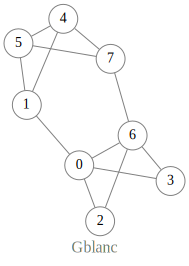

In [102]:
display(Mat,directed=False,title="Gblanc")

In [103]:
model = LpProblem(name="Aeroport", sense=LpMinimize)
routes =[(i,j) for i in range(c) for j in  range(n)]
# Define the decision variables
x = {LpVariable("les conducteur",(c,n))}
v = {LpVariable("les jobs", (c) )}
y = {LpVariable(name=f"y") }

# Add constraints
for i in range (c):
   model+= (lpSum(x[i][j] for j in range(n)))==1,

for i in range(c):
   for k in range(len(ex[0])):
      model+= (x[i,ex[0][k]]+x[i,ex[1][k]])<=1,

for j in range(n):
   model+= (v[i]==lpSum(x[i][j] for i in range(c) )),

for i in range(c):
      model+= (v[i]<=y ),

# Set objective

model += y,
# Solve the optimization problem using GLPK

status = model.solve(solver=GLPK(msg=False)) 
   # The status of the solution is printed to the screen
print("Status:", LpStatus[model.status])
   
return model.objective.value()



In [104]:
#print(modelGLPK(6,len(Mat),Ex))

In [105]:
def modelGLPK(c,M,ex):
   n=len(M)
   #Set Problem Variable
   prob = LpProblem("Transportation", LpMinimize)
   routes =[(i,j) for i in c for j in  n]

   # Define the decision variables
      x = LpVariable("les conducteur",for (i,j) in routes)
      v = LpVariable{"les missions",for i in range(c)}
      y = LpVariable("fct", lowBound=0)

   #OBJECTIVE FUNCTION
   prob += y
   #CONSTRAINTS:
   # Add constraints
      for i in range (c):
         prob += (lpSum(x[i][j]==1 for j in range(n) )),

      for i in range(c):
         for k in range(len(ex[0])):
            prob += (x[i,ex[0][k]]+x[i,ex[1][k]]<=1),

      for j in range(n):
         prob += (v[i]==lpSum(x[i][j] for i in range(c) )),

      for i in range(c):
         model+= (v[i]<=y ),
   prob.solve()
   print("Status:", LpStatus [prob.status])
   for v in prob.variables():
      if v. varValue> 0:
         print(v.name,"=",v.varValue)
   print("Total bushel-miles =", value(prob.objective))

IndentationError: unexpected indent (Temp/ipykernel_28272/2970043339.py, line 8)

In [110]:
WP(Adj)

TypeError: list indices must be integers or slices, not tuple

In [ ]:
display(Mat,directed=False,title="DSATUR_G2",dispo="neato",color = dsatur(Mat))

KeyboardInterrupt: 